# **PCA-Principle Components Analysis**

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
iris=load_iris()

In [12]:
X=iris.data
y=iris.target

In [13]:
X_scaled=StandardScaler().fit_transform(X)

In [14]:
X.shape

(150, 4)

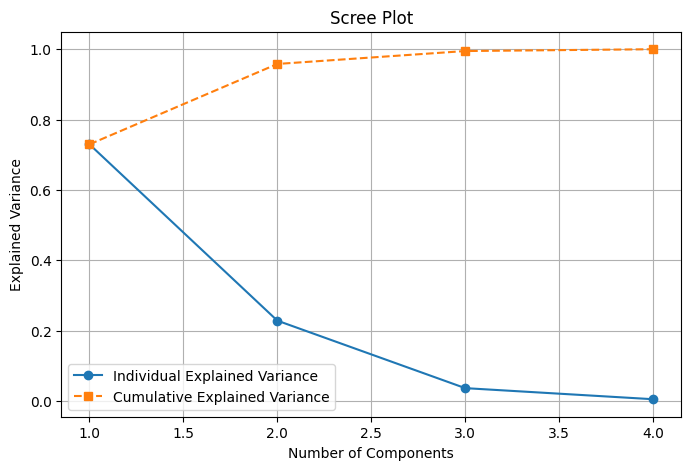

In [15]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         'o-', label='Individual Explained Variance')

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         's--', label='Cumulative Explained Variance')

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.legend()
plt.show()


In [16]:
pca_95=PCA(n_components=0.95)
X_reduced=pca_95.fit_transform(X_scaled)
print(f"Reduced Shape: {X_reduced.shape}")

Reduced Shape: (150, 2)


# **Visualize Top 2 Components**

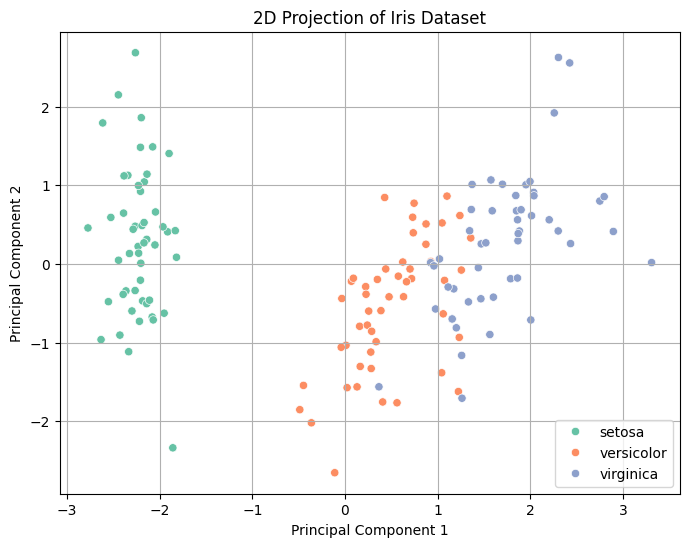

In [17]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:, 0],
                y=X_2d[:, 1],
                hue=iris.target_names[y],
                palette='Set2')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Iris Dataset')
plt.grid(True)
